In [52]:
import pandas as pd

In [55]:
df = pd.DataFrame()
df = pd.read_csv("mtrB_narL_mapiya_output.csv")
a = "mtrB_narL"
df.sort_values(by=' possible_interaction_forces', ascending=True)

,protein-A,protein-B,distance,possible_interaction_forces
14,ARG:188,MET:291,4.760,electrostatic
13,ARG:188,MET:288,3.060,electrostatic
12,THR:43,ARG:250,3.078,electrostatic
11,ASP:35,THR:340,4.551,electrostatic
10,ASP:31,THR:340,4.088,electrostatic
9,ASP:31,THR:338,4.032,electrostatic
7,ARG:27,THR:338,2.910,electrostatic
8,MET:28,ARG:339,3.312,electrostatic
5,THR:24,ASP:336,3.821,electrostatic
4,THR:24,LYS:335,3.476,electrostatic


stacking
 electrostatic
 hydrophobic
 induction + dispersion
 salt bridge


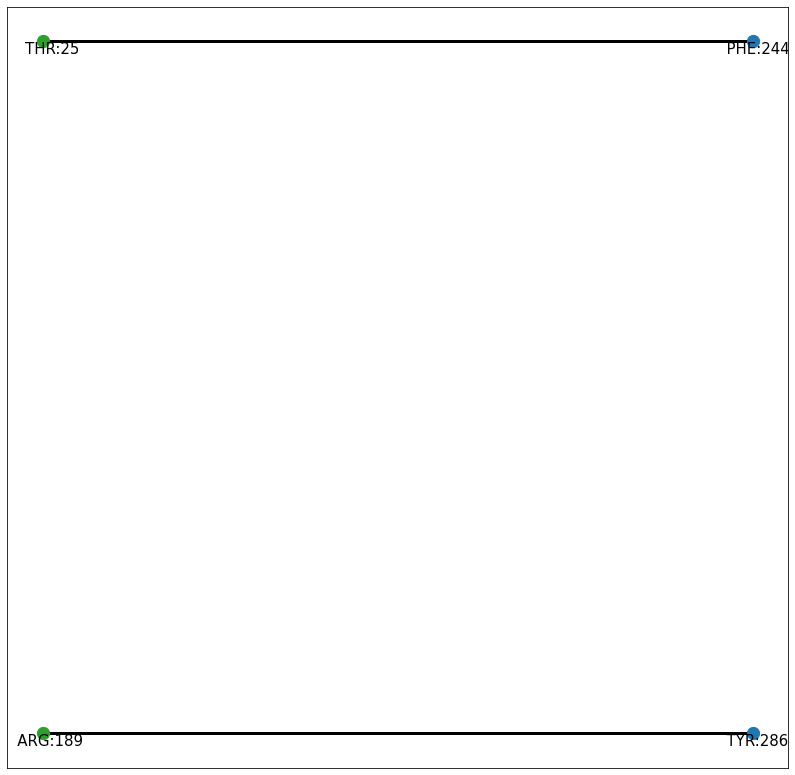

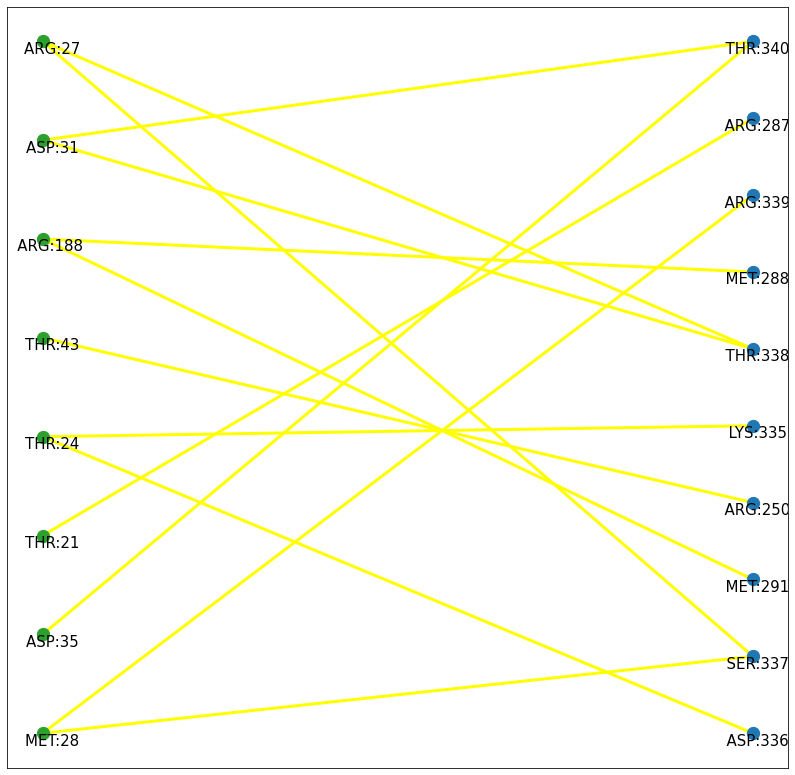

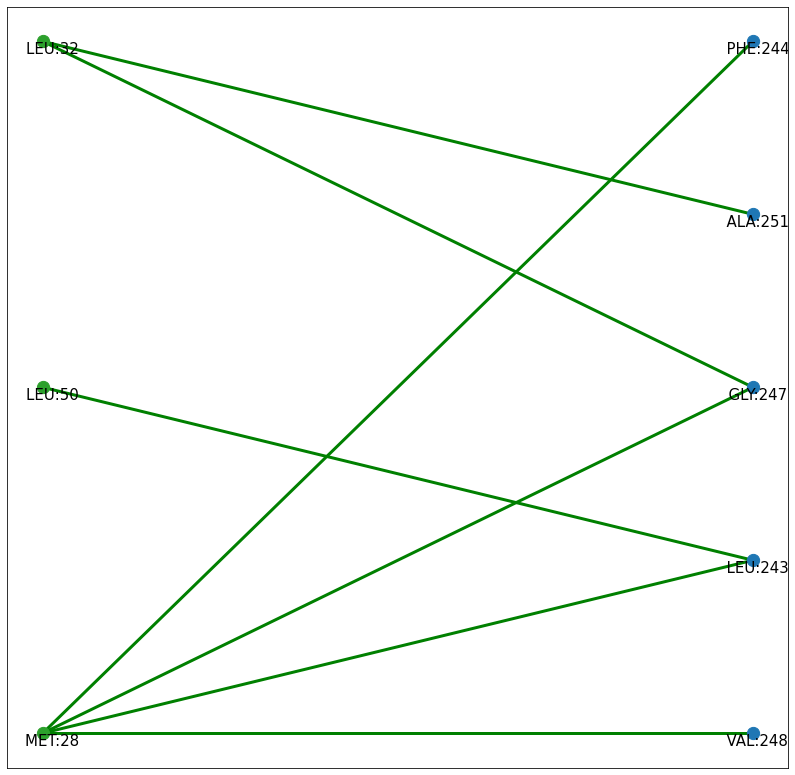

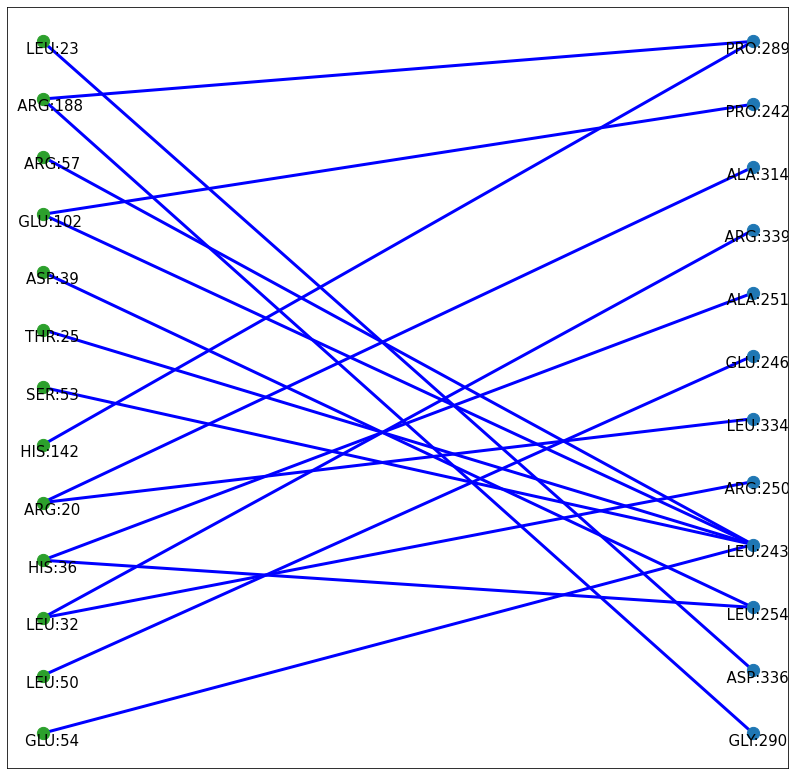

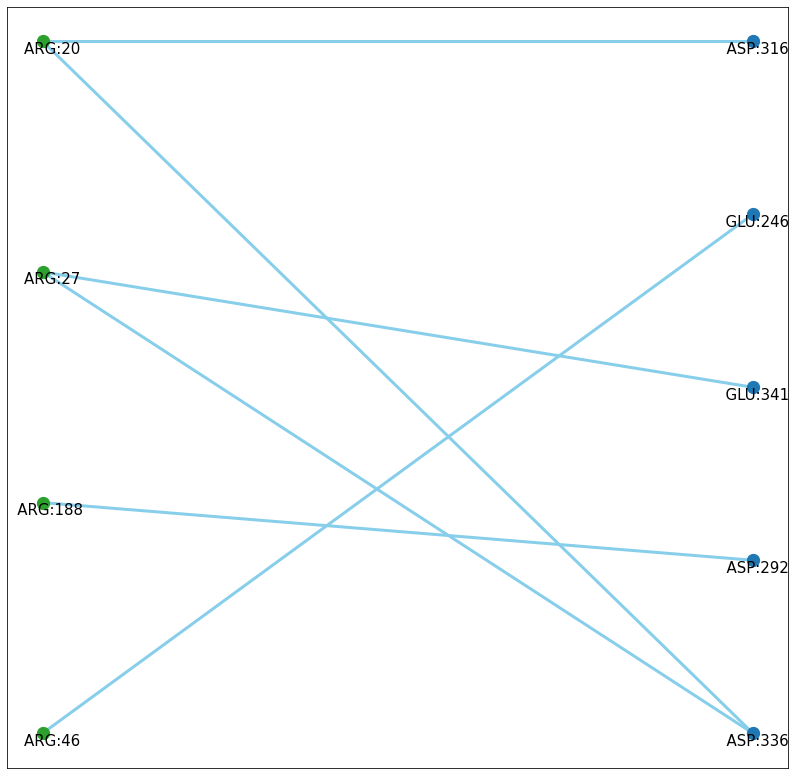

In [58]:
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
G = nx.Graph()
#figure(figsize=(14, 14))
j = ['k','yellow','green','blue','skyblue','orange']
for i in range(0,len(df[' possible_interaction_forces'].unique())):
    df1 = df[df[' possible_interaction_forces'] == df[' possible_interaction_forces'].unique()[i]]
    print(df[' possible_interaction_forces'].unique()[i])
    #g = nx.from_pandas_edgelist(df1, ' protein-A', 'protein-B', [' distance'])
    #figure(figsize=(10, 8))
    #nx.draw(g, with_labels=True)
    B = nx.Graph()
    B = nx.from_pandas_edgelist(df1, ' protein-A', 'protein-B', [' distance'])
    B.add_nodes_from(df1[' protein-A'].unique(), bipartite=0, label='Prot_A')
    B.add_nodes_from(df1['protein-B'].unique(), bipartite=1, label='Prot_B')
    left_or_top = df1[' protein-A'].unique()
    pos = nx.bipartite_layout(B, left_or_top)
    figure(figsize=(14, 14))
    #options = {"edgecolors": "tab:blue", "node_size": 500, "alpha": 1}
    options = {"node_size": 150, "alpha": 1}
    nx.draw_networkx_nodes(B, pos, nodelist=df1[' protein-A'].unique(), node_color="tab:green",**options)
    nx.draw_networkx_nodes(B, pos, nodelist=df1['protein-B'].unique(), node_color="tab:blue", **options)
    nx.draw_networkx_edges(B,pos,edge_color=j[i],width=3)
    labels = nx.draw_networkx_labels(B, pos,horizontalalignment='center',
                                     verticalalignment='top',font_size=15,clip_on=False)
    
    plt.savefig(a+"_"+df[' possible_interaction_forces'].unique()[i]+'.png')

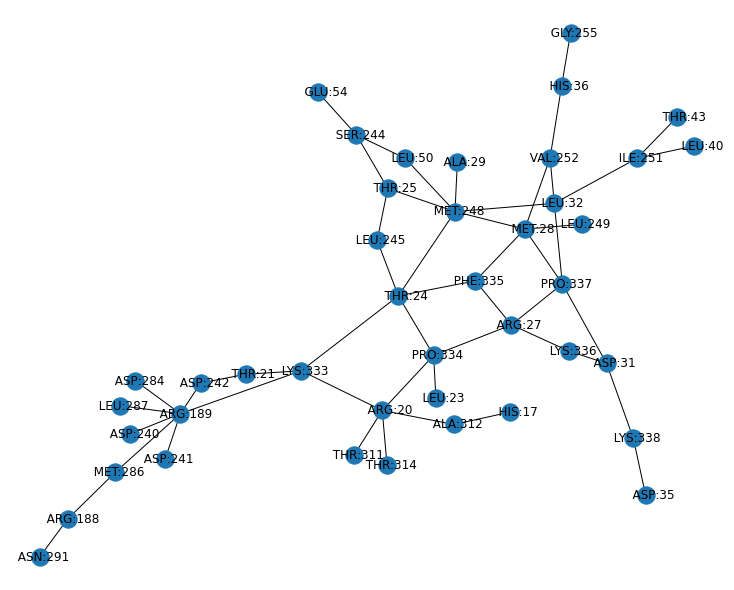

In [17]:
df1 = df[[' protein-A', 'protein-B']]



G = nx.from_pandas_edgelist(df1, ' protein-A', 'protein-B')

g = nx.from_pandas_edgelist(df, ' protein-A', 'protein-B', [' distance'])

from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw(g, with_labels=True)

In [66]:
import matplotlib.pyplot as plt
B = nx.Graph()
B = nx.from_pandas_edgelist(df, ' protein-A', 'protein-B', [' distance'])
B.add_nodes_from(df1[' protein-A'].unique(), bipartite=0, label='Prot_A')
B.add_nodes_from(df1['protein-B'].unique(), bipartite=1, label='Prot_B')

#nx.draw_networkx_nodes(B,pos, node_color="tab:red")
#B.add_edges_from(df1[' protein-A'], label='distance')

# Now instead of spring_layout, use bipartite_layout

# First specify the nodes you want on left or top
left_or_top = df1[' protein-A'].unique()

# Then create a bipartite layout
pos = nx.bipartite_layout(B, left_or_top)

# Pass that layout to nx.draw
#figure(figsize=(5, 8))
#nx.draw(B,pos,node_color="tab:red",edge_color='#00bb5e',width=3,
     #edge_cmap=plt.cm.Blues,with_labels=True)
#nx.draw(B,pos,node_color="tab:red",edge_color='#00bb5e',width=3,with_labels=True)

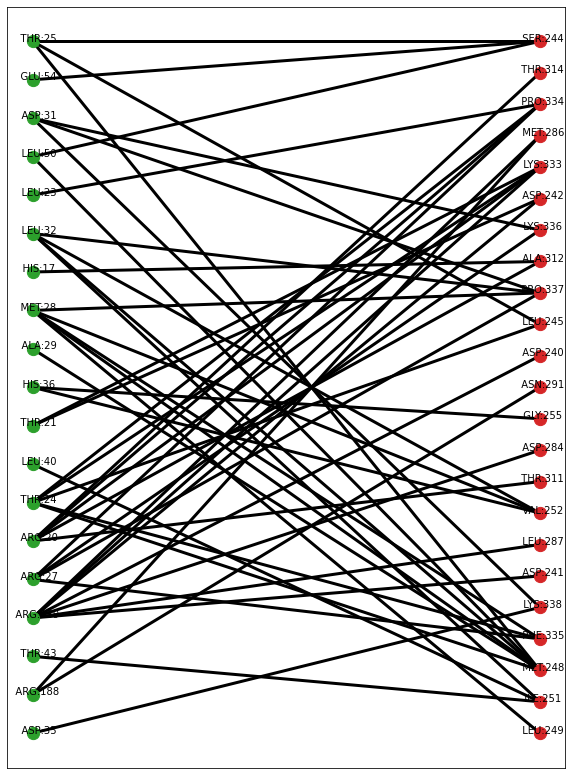

In [111]:
figure(figsize=(10, 14))
#options = {"edgecolors": "tab:blue", "node_size": 500, "alpha": 1}
options = {"node_size": 150, "alpha": 1}
nx.draw_networkx_nodes(B, pos, nodelist=df1[' protein-A'].unique(), node_color="tab:green",**options)
nx.draw_networkx_nodes(B, pos, nodelist=df1['protein-B'].unique(), node_color="tab:red", **options)
nx.draw_networkx_edges(B,pos,width=3)
labels = nx.draw_networkx_labels(B, pos, verticalalignment='baseline',font_size=10,clip_on=False)
#nx.draw_networkx_edges(B,pos,width=3,with_labels=True)

In [ ]:
for edge in g.edges:
    if edge in selected_edges or (edge[1], edge[0]) in selected_edges:
        g.add_edge(edge[0],edge[1],color='g',weight=10)
    else:
        g.add_edge(edge[0],edge[1],color='b',weight=0.1)
nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True, 
        edge_color=nx.get_edge_attributes(g,'color').values())


In [18]:
df

,protein-A,protein-B,distance,possible_interaction_forces
0,HIS:17,ALA:312,4.958,induction + dispersion
1,ARG:20,THR:311,4.970,"electrostatic: ion-dipole,hydrogen bond,"
2,ARG:20,ALA:312,3.127,induction + dispersion
3,ARG:20,THR:314,3.880,"electrostatic: ion-dipole,hydrogen bond,"
4,ARG:20,LYS:333,3.195,ionic repulsion CAUTION: possible repulsion
5,ARG:20,PRO:334,3.960,induction + dispersion
6,THR:21,ASP:242,4.383,"electrostatic: ion-dipole,hydrogen bond,"
7,THR:21,LYS:333,4.168,"electrostatic: ion-dipole,hydrogen bond,"
8,LEU:23,PRO:334,3.362,"hydrophobic,"
9,THR:24,LEU:245,3.678,induction + dispersion
